In [3]:
import numpy as np
import pandas as pd 
import glob, re
from wordcloud import WordCloud, STOPWORDS 
from collections import Counter
from nltk.tokenize import wordpunct_tokenize as tokenize
import string, random, os
import matplotlib.pyplot as plt
from collections import Counter
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

In [4]:
# სია დოკუმენტების თითოეული ელემენტი
# არის ვიკიპედიის არტიკლებიდან
visual_docs = []
for ind, filename in enumerate(glob.glob("../data/train/*")):
    if ind % 10000 == 0:
        print(ind, 'docs read')
    fd = open(filename, 'r')
    text = fd.read() 
    visual_docs.append(text)
    fd.close()
    
# ტოკენიზირებული არტიკლები
visual_tokenized = [tokenize(doc) for doc in visual_docs]
visual_tokenized[0]

0 docs read
10000 docs read
20000 docs read
30000 docs read
40000 docs read


['კონვექცია',
 '(',
 'ატმოსფერო',
 ')',
 'კონვექცია',
 '(',
 'ლათ',
 '.',
 'Convectio',
 '–',
 'მოზიდვა',
 ',',
 'მოტანა',
 ')',
 '—',
 'ჰაერის',
 'გარკვეული',
 'მოცულობის',
 'ვერტიკალური',
 'გადაადგილება',
 ',',
 'რაც',
 'გამოწვეულია',
 'არქიმედის',
 'ძალით',
 '—',
 'გარემომცველ',
 'გარემოსთან',
 'შედარებით',
 'უფრო',
 'თბილი',
 'და',
 'ნაკლებად',
 'მკვრივი',
 'ჰაერი',
 'მიისწრაფვის',
 'ზევით',
 ',',
 'ხოლო',
 'უფრო',
 'ცივი',
 'და',
 'მკვრივი',
 'ჰაერი',
 'ქვევით',
 'ეშვება',
 '.',
 'ჰაერის',
 'ნაკადის',
 'სიჩქარე',
 ',',
 'ჩვეულებრივ',
 ',',
 'რამდენიმე',
 'მ',
 '/',
 'წმ',
 '-',
 'ია',
 'და',
 'ზოგჯერ',
 '2',
 '-',
 '30',
 'მ',
 '/',
 'წმ',
 'სჭარბობს',
 '.',
 'კონვექციის',
 'განვითარება',
 'დაკავშირებულია',
 'ჰაერის',
 'ტემპერატურის',
 'ვერტიკალურ',
 'განაწილებასთან',
 '.',
 'აღმავალი',
 'თბილი',
 'ჰაერი',
 'მანამ',
 'მიისწრაფვის',
 'ზევით',
 ',',
 'სანამ',
 'მისი',
 'ტემპერატურა',
 'მაღალია',
 'გარემომცველი',
 'ჰაერის',
 'ტემპერატურაზე',
 ',',
 'დაღმავალი',
 'ცივი',
 'ჰაერი',
 'კ

In [37]:
# ამოწმებს word არის თუ არა სრულად ქართული
# სიტყვა(ანუ შეიცავს თუ არა ქართული ასოს გარდა სხვა სიმბოლოს)
def is_geo_word(word):
    alphabet = set(['ა', 'ბ', 'გ', 'დ', 'ე', 'ვ', 'ზ', 'თ', 'ი', 'კ', 'ლ', 'მ', 'ნ', 'ო',\
                    'პ', 'ჟ', 'რ', 'ს', 'ტ', 'უ', 'ფ', 'ქ', 'ღ', 'ყ', 'შ', 'ჩ', 'ც', 'ძ',\
                    'წ', 'ჭ', 'ხ', 'ჯ', 'ჰ'])
    for char in word:
        if char not in alphabet:
            return False
        
    return True

# აბრუნებს კორპუსში არსებულ სტატიებში
# განსხვავებული ფორმის მქონე სიტყვების რაოდენობას
def diff_word_count():
    counter = Counter()
    for doc in visual_tokenized:
        for word in doc:
            if word not in counter:
                counter[word] = 0
            counter[word] += 1
            
    return len(counter)

In [38]:
# გარკვევა რა არის მონაცემებში განსხვავებული
# ფორმის სიტყვების რაოდენობა
diff_word_count()

829972

In [39]:
# აბრუნებს ასოების სიხშირის ჯამურ განაწილებას 
# სტატიებში 
def get_chars_count():
    plt.figure(figsize = (15, 15))

    counter = Counter()
    for doc in visual_tokenized:
        for word in doc:
            if not is_geo_word(word):
                continue

            for char in word:
                if char not in counter:
                    counter[char] = 0
                counter[char] += 1
    
    # სიხშირის ზრდადობით დალაგება
    freq_lst = []
    for geo_char in counter:
        freq_lst += [(counter[geo_char], geo_char)]
    freq_lst.sort()
    freq_lst.reverse()
    
    # პლოტირება
    names, values = [], []
    for value, name in freq_lst:
        names += [name]
        values += [value]
    plt.subplot(131)
    plt.bar(names, values)
    plt.show()
    
    return freq_lst

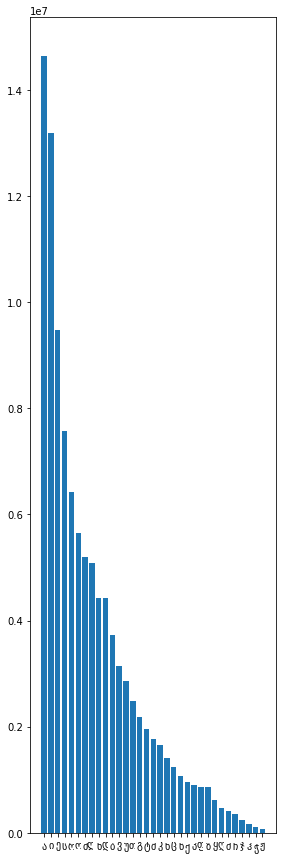

[(14634676, 'ა'),
 (13186082, 'ი'),
 (9482560, 'ე'),
 (7574504, 'ს'),
 (6417055, 'რ'),
 (5645703, 'ო'),
 (5202931, 'მ'),
 (5089602, 'ლ'),
 (4432505, 'ნ'),
 (4423210, 'დ'),
 (3729059, 'ბ'),
 (3142769, 'ვ'),
 (2865313, 'უ'),
 (2490069, 'თ'),
 (2183541, 'გ'),
 (1958785, 'ტ'),
 (1771978, 'შ'),
 (1656350, 'კ'),
 (1404684, 'ხ'),
 (1248366, 'ც'),
 (1074667, 'წ'),
 (959274, 'ქ'),
 (898044, 'პ'),
 (863654, 'ფ'),
 (854909, 'ზ'),
 (619743, 'ყ'),
 (473036, 'ღ'),
 (413024, 'ძ'),
 (348933, 'ჩ'),
 (246329, 'ჯ'),
 (158424, 'ჰ'),
 (118708, 'ჭ'),
 (74246, 'ჟ')]

In [40]:
# ჩვენება ქართული სიმბოლოების გამოყენების
# სიხშირის სტატიებსში ჯამურად
get_chars_count()

# EDA(Exploratory Data Analysis)

ეს ნაწილი მოიცავს ვიზუალიზაციას EDA(Exploratory Data Analysis) რომ გავეცნოთ მონაცემებს და გავიაზროთ თუ რეალურად რასთან გვაქვს საქმე და საჭიროებს თუ არა დამატებით დამუშავებას და ა.შ.

In [41]:
# find which words are top words(one of the words between 
# top 10 most frequently occured ones) in most articles
def is_bad(word):
    punct_and_digits = '!"#%&+,-./:;=?()²' + "'" + '0123456789'
    for ch in word:
        if ch in punct_and_digits:
            return True
    
    return False

def visualize_top_words():
    top_words_cache = {}
    for doc_tokenized in visual_tokenized:
        occurence_count = {}
        for word in doc_tokenized:
            if is_bad(word):
                continue
            if word not in occurence_count:
                occurence_count[word] = 0
            occurence_count[word] += 1

        # list of most frequently used words
        frequent_words = []
        for word in occurence_count:
            frequent_words += [(occurence_count[word], word)]
        frequent_words.sort()
        frequent_words = frequent_words[:10]

        for _, word in frequent_words:
            if word not in top_words_cache:
                top_words_cache[word] = 0
            top_words_cache[word] += 1

    # list of top words
    top_words = []
    for word in top_words_cache:
        top_words += [(top_words_cache[word], word)]

    top_words.sort()
    top_words.reverse()
    values = []
    for cnt, _ in top_words:
        values += [cnt]
    plt.plot(values[:100])
    plt.ylabel("top words distribution")
    plt.show()
    
    return top_words[:100]

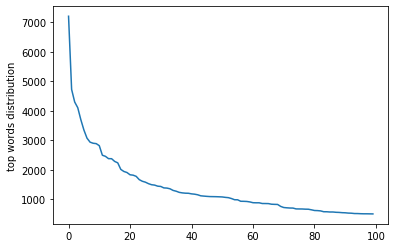

[(7212, 'ამ'),
 (4731, 'არ'),
 (4304, 'არის'),
 (4110, 'აგრეთვე'),
 (3704, 'ასევე'),
 (3354, 'აქვს'),
 (3079, 'ან'),
 (2943, 'I'),
 (2906, 'გ'),
 (2893, 'II'),
 (2824, 'ამავე'),
 (2500, 'XIX'),
 (2462, 'ბიოგრაფია'),
 (2384, 'ადგილი'),
 (2382, 'ადამიანი'),
 (2290, 'ა'),
 (2242, 'ამის'),
 (2019, 'ამჟამად'),
 (1949, 'ადგილობრივი'),
 (1914, 'აგვისტოს'),
 (1837, 'III'),
 (1824, 'ადრე'),
 (1784, 'XX'),
 (1672, 'აღმოსავლეთ'),
 (1617, 'აგვისტო'),
 (1586, 'აგებულია'),
 (1536, 'XVIII'),
 (1500, 'დ'),
 (1487, 'ადრეული'),
 (1451, 'IV'),
 (1441, 'ადამიანს'),
 (1392, 'ადამიანის'),
 (1386, 'ადგილზე'),
 (1362, 'X'),
 (1307, 'აქ'),
 (1280, 'ადმინისტრაციული'),
 (1241, 'არქიტექტურული'),
 (1223, 'XVII'),
 (1213, 'არიან'),
 (1210, 'აღმოსავლეთით'),
 (1190, 'ახალი'),
 (1179, 'აპრილი'),
 (1159, 'V'),
 (1124, 'XVI'),
 (1114, 'ავტორი'),
 (1105, 'ასაკში'),
 (1098, 'ადგილას'),
 (1096, 'ამისა'),
 (1094, 'ამიტომ'),
 (1090, 'არა'),
 (1085, 'ალექსანდრე'),
 (1071, 'VI'),
 (1061, 'არსებული'),
 (1031, 'არსებობს'),
 (991

In [42]:
# თითოეული სტატიის ჭრილში არსებული top_word-ების ვიზუალიზაცია
visualize_top_words()

In [43]:
# ვნახოთ უბრალოდ სიტყვების ჯამური სიხშირების განაწილება დოკუმენტების 
# მასშტაბით ასევე ვნახოთ ყველაზე ხშირად გამოყენებადი სიტყვები
def visualize_words_frequencies(skip_bad_words):
    word_frequenncy_cache = {}
    for doc_tokenized in visual_tokenized:
        occurence_count = {}
        for word in doc_tokenized:
            if is_bad(word) and skip_bad_words:
                continue
            if word not in word_frequenncy_cache:
                word_frequenncy_cache[word] = 0
            word_frequenncy_cache[word] += 1

    # list of top words
    top_words = []
    for word in word_frequenncy_cache:
        top_words += [(word_frequenncy_cache[word], word)]

    top_words.sort()
    top_words.reverse()
    values = []
    for cnt, _ in top_words:
        values += [cnt]
    plt.plot(values[:100])
    plt.ylabel("top words distribution")
    plt.show()
    return top_words[:100]

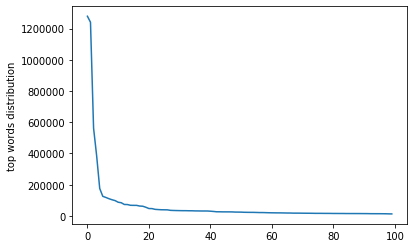

[(1278513, ','),
 (1240008, '.'),
 (562595, 'და'),
 (385152, '-'),
 (175647, '('),
 (125235, 'წელს'),
 (118124, '„'),
 (110087, 'წლის'),
 (103414, 'იყო'),
 (97905, '—'),
 (87524, ')'),
 (84278, '"'),
 (73185, 'რომ'),
 (72720, 'რომელიც'),
 (67962, '“'),
 (67459, ':'),
 (67375, 'ის'),
 (63099, 'შემდეგ'),
 (61920, 'მისი'),
 (55379, 'ამ'),
 (47168, 'არ'),
 (46739, 'იგი'),
 (41915, ').'),
 (40547, 'როგორც'),
 (39374, 'კი'),
 (39069, '),'),
 (38725, 'ეს'),
 (35578, 'ასევე'),
 (34748, '–'),
 (34188, 'ხოლო'),
 (33750, 'არის'),
 (33405, 'დიდი'),
 (33380, 'ერთ'),
 (32874, 'ერთი'),
 (32738, 'მას'),
 (31990, 'წლებში'),
 (31791, 'პირველი'),
 (31432, ';'),
 (31363, 'სხვა'),
 (31359, 'შორის'),
 (30116, 'მათ'),
 (28461, 'საქართველოს'),
 (26377, 'ს'),
 (26297, 'თუმცა'),
 (25838, 'ან'),
 (25802, 'დროს'),
 (25686, 'მაგრამ'),
 (25528, 'მან'),
 (24511, 'მიერ'),
 (24272, '1'),
 (24060, 'სადაც'),
 (23140, 'გახდა'),
 (22837, 'მის'),
 (22579, 'ყველაზე'),
 (22552, 'მეორე'),
 (21981, '2'),
 (21374, 'ერთად'),
 (2

In [44]:
""" ვიზუალიზაცია სრულად ტექსტების ჭრილში ჯამური სიხშირის
    ცუდი სიტყვები(არაასოები შემცველი ტოკენების) ჩათვლით
"""
visualize_words_frequencies(False)

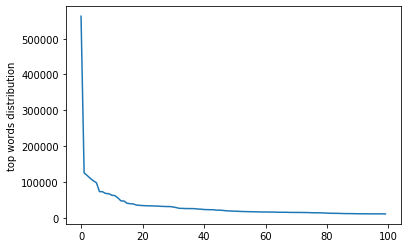

[(562595, 'და'),
 (125235, 'წელს'),
 (118124, '„'),
 (110087, 'წლის'),
 (103414, 'იყო'),
 (97905, '—'),
 (73185, 'რომ'),
 (72720, 'რომელიც'),
 (67962, '“'),
 (67375, 'ის'),
 (63099, 'შემდეგ'),
 (61920, 'მისი'),
 (55379, 'ამ'),
 (47168, 'არ'),
 (46739, 'იგი'),
 (40547, 'როგორც'),
 (39374, 'კი'),
 (38725, 'ეს'),
 (35578, 'ასევე'),
 (34748, '–'),
 (34188, 'ხოლო'),
 (33750, 'არის'),
 (33405, 'დიდი'),
 (33380, 'ერთ'),
 (32874, 'ერთი'),
 (32738, 'მას'),
 (31990, 'წლებში'),
 (31791, 'პირველი'),
 (31363, 'სხვა'),
 (31359, 'შორის'),
 (30116, 'მათ'),
 (28461, 'საქართველოს'),
 (26377, 'ს'),
 (26297, 'თუმცა'),
 (25838, 'ან'),
 (25802, 'დროს'),
 (25686, 'მაგრამ'),
 (25528, 'მან'),
 (24511, 'მიერ'),
 (24060, 'სადაც'),
 (23140, 'გახდა'),
 (22837, 'მის'),
 (22579, 'ყველაზე'),
 (22552, 'მეორე'),
 (21374, 'ერთად'),
 (21347, 'რაც'),
 (20781, 'მხოლოდ'),
 (19800, 'უფრო'),
 (19231, 'აქვს'),
 (18799, 'რომლებიც'),
 (18436, 'ორი'),
 (18310, 'ახალი'),
 (17625, 'სამხრეთ'),
 (17560, 'წლიდან'),
 (17271, 'რომლის'),

In [45]:
""" ვიზუალიზაცია სრულად ტექსტების ჭრილში ჯამური სიხშირის
    ცუდი სიტყვები(არაასოები შემცველი ტოკენების) ჩათვლით
"""
visualize_words_frequencies(True)